# HW4_2 - Kernel Methods

Learning contents:
* Kernel Regression
    * Compute Gram Matrix
    * Estimate the target values for a new set of data points
    * Plot the (x_new, t_new)-pairs on top of the original data
    * Play around with the kernel $\sigma$. How does the fit look using $\sigma=1$ as compared to  $\sigma=10$?


In [1]:
# Dependencies
import numpy as np
import pandas as pd
import scipy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 1) Kernel Regression

We'll be working with two variable from the [Boston housing dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

x = data[:, 12]  # LSTAT: % lower status of the population.
t = target  # MEDV: Median value of owner-occupied homes in $1000s.

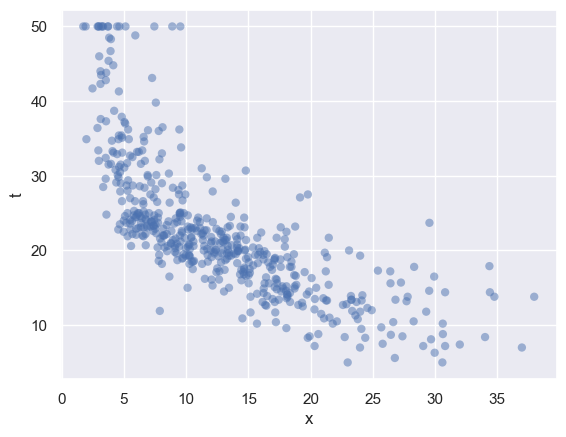

In [3]:
def plot_scatter(data, target, alpha=0.5, legend=True):
    scatter = plt.scatter(data, target,  edgecolor='none', alpha=alpha)
    plt.xlabel('x')
    plt.ylabel('t')

# Let's plot all the data in 2D
plot_scatter(x, t)

## 1.1) Compute the kernel gram matrix
Do it using the Gaussian Kernel based on Euclidean distance.

Use $\sigma = 2$

First, perform the computation for the 5 first samples. Then do it for all samples. What is the shape of the Gram matrix for all samples?

In [4]:
sigma = 2

In [5]:
# Compute Gram matrix for 5 first samples
def gaussian_kernel(x, y, sigma):
    return np.exp(-np.linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

# For 5 first samples
K_5 = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        K_5[i,j] = gaussian_kernel(x[i], x[j], sigma)
print("Gram Matrix for first 5 samples:\n", K_5)

Gram Matrix for first 5 samples:
 [[1.         0.11495667 0.89331814 0.59440166 0.98480414]
 [0.11495667 1.         0.03823467 0.0081887  0.16291731]
 [0.89331814 0.03823467 1.         0.86198923 0.80957165]
 [0.59440166 0.0081887  0.86198923 1.         0.48967543]
 [0.98480414 0.16291731 0.80957165 0.48967543 1.        ]]


In [6]:
# Compute Gram matrix for all samples
N = len(x)
K = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        K[i,j] = gaussian_kernel(x[i], x[j], sigma)

print("shape = {}".format(K.shape))
K

shape = (506, 506)


array([[1.        , 0.11495667, 0.89331814, ..., 0.94700586, 0.7548396 ,
        0.3495006 ],
       [0.11495667, 1.        , 0.03823467, ..., 0.21626517, 0.41294123,
        0.82000077],
       [0.89331814, 0.03823467, 1.        , ..., 0.7232412 , 0.47221896,
        0.15679556],
       ...,
       [0.94700586, 0.21626517, 0.7232412 , ..., 1.        , 0.91557774,
        0.53408515],
       [0.7548396 , 0.41294123, 0.47221896, ..., 0.91557774, 1.        ,
        0.78270454],
       [0.3495006 , 0.82000077, 0.15679556, ..., 0.53408515, 0.78270454,
        1.        ]])

## 1.2) Estimate the target values for a new set of data points
Use a regularisation term of lambda = 0.001

In [7]:
l = 0.001 # lambda
sigma = 2
x_new = np.linspace(0, 40, 100) # Range in which to compute estimated values

In [8]:
alpha = np.linalg.inv(K + l*np.eye(N)).dot(t)
t_new = np.zeros(len(x_new))
for i in range(len(x_new)):
    t_new[i] = sum(alpha[j] * gaussian_kernel(x[j], x_new[i], sigma) for j in range(N))

## 1.3) Plot the (x_new, t_new)-pairs on top of the original data
Hint: You can use `seaborn.lineplot`

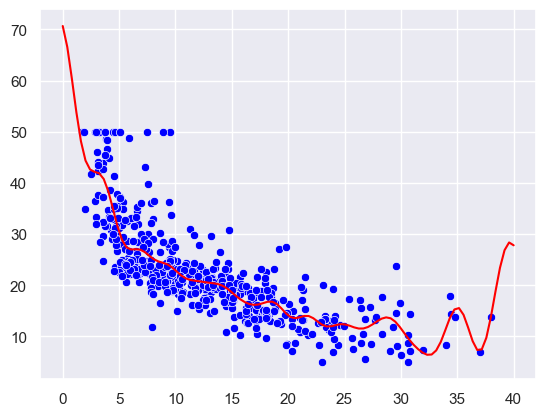

In [9]:
sns.scatterplot(x=x, y=t, color='blue')
sns.lineplot(x=x_new, y=t_new, color='red')
plt.show()

## 1.4) Play around with the kernel $\sigma$. How does the fit look using $\sigma=1$ as compared to  $\sigma=10$?

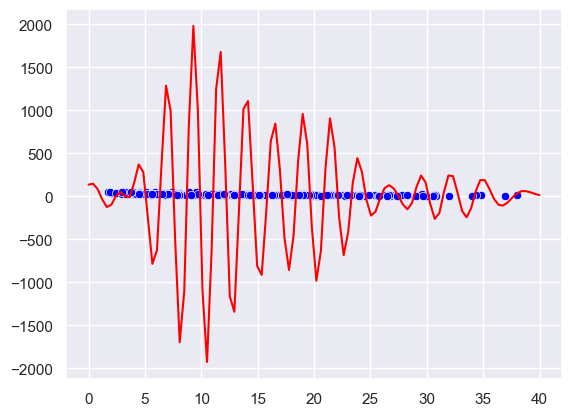

In [10]:
sigma = 1
t_new = np.zeros(len(x_new))
for i in range(len(x_new)):
    t_new[i] = sum(alpha[j] * gaussian_kernel(x[j], x_new[i], sigma) for j in range(N))
sns.scatterplot(x=x, y=t, color='blue')
sns.lineplot(x=x_new, y=t_new, color='red')
plt.show()

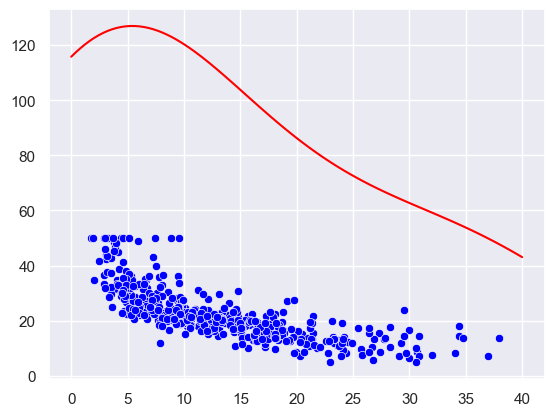

In [11]:
sigma = 10
t_new = np.zeros(len(x_new))
for i in range(len(x_new)):
    t_new[i] = sum(alpha[j] * gaussian_kernel(x[j], x_new[i], sigma) for j in range(N))
sns.scatterplot(x=x, y=t, color='blue')
sns.lineplot(x=x_new, y=t_new, color='red')
plt.show()